# Importing the libraries

In [34]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing, model_selection
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization, ReLU
from keras import regularizers, optimizers
from tensorflow.keras.optimizers import SGD
from keras.metrics import categorical_crossentropy
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Loading and Preprocessing the data

In [15]:
Data = pd.read_csv('dataset IV.csv')
Data.head()

id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]

In [3]:
Data.pop('Unnamed: 32')
x = Data.copy()
x.pop('id')
x.pop('diagnosis')
x = np.array(x)
y = np.array(Data['diagnosis'])
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [4]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = model_selection.train_test_split(x_test, y_test, test_size=0.5, random_state=40)

In [5]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_val = sc.transform(x_val)

# Implementing the model and training it

In [52]:
model = tf.keras.models.Sequential()
model.add(Dense(units=32, kernel_regularizer=regularizers.l2(1e-5)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.2))
model.add(Dense(units=32, kernel_regularizer=regularizers.l2(1e-5)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dense(1, activation='sigmoid'))

In [53]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    0.00001,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

In [61]:
model.compile(SGD(learning_rate=lr_schedule, momentum=1), loss=['binary_crossentropy'], metrics=['accuracy'])

In [62]:
history = model.fit(x_train, y_train, batch_size = 128, epochs = 1000, validation_data=(x_val, y_val))

Epoch 1/1000
4/4 [==============================] - 1s 67ms/step - loss: 0.5968 - accuracy: 0.6440 - val_loss: 0.5307 - val_accuracy: 0.7544
Epoch 2/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.5871 - accuracy: 0.6659 - val_loss: 0.5306 - val_accuracy: 0.7544
Epoch 3/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.5981 - accuracy: 0.6791 - val_loss: 0.5305 - val_accuracy: 0.7544
Epoch 4/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.5887 - accuracy: 0.6615 - val_loss: 0.5303 - val_accuracy: 0.7544
Epoch 5/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.5979 - accuracy: 0.6462 - val_loss: 0.5300 - val_accuracy: 0.7544
Epoch 6/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.6044 - accuracy: 0.6527 - val_loss: 0.5295 - val_accuracy: 0.7544
Epoch 7/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.5889 - accuracy: 0.6857 - val_loss: 0.5290 - val_accuracy: 0.7544
Epoch 8/1000


# Evaluation

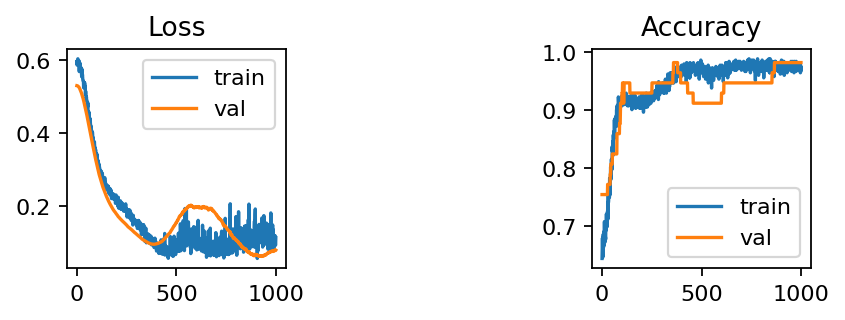

In [63]:
plt.figure(dpi=160)

plt.subplot(231)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()

plt.subplot(233)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.show()

In [64]:
y_hat = model.predict(x_test)

2/2 [==============================] - 0s 5ms/step


In [65]:
y_hat[y_hat>=0.5] = 1
y_hat[y_hat<0.5] = 0


For Test Set
F1 score:  0.9649122807017544
Accuracy:  0.9649122807017544
Precision:  0.9649122807017544
Recall:  0.9649122807017544
Confusion Matrix: 



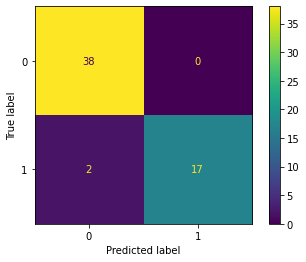

In [66]:
print('\nFor Test Set')
f1 = f1_score(y_test, y_hat, average='micro')
print('F1 score: ' , f1)

accuracy = accuracy_score(y_test, y_hat)
print('Accuracy: ' , accuracy)

precision = precision_score(y_test, y_hat, average='micro')
print('Precision: ' , precision)

recall = recall_score(y_test, y_hat, average='micro')
print('Recall: ' , recall)

matrix = ConfusionMatrixDisplay(confusion_matrix(y_test, y_hat))
print('Confusion Matrix: \n')
matrix.plot()
plt.show()